# The Sparks Foundation GRIP - JAN 2022

# Role - Data Science and Business Analytics Intern

# Task 6 = Prediction using Decision Tree algorithm(Level - Intermidiate)

## Problem statement : create the Decision Tree classifier and visualize it graphically.

## Dataset link = https://bit.ly/3kXTdox

# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as feature_name_in_
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report

# Import dataset

In [2]:
data = pd.read_csv(r"C:\Users\Rutuja Muthe\Downloads\The sparks foundation\Iris (1).csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Getting the information of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape

(150, 6)

In [6]:
data = data.drop('Id',axis=1)

In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Check for Outliers by box plot

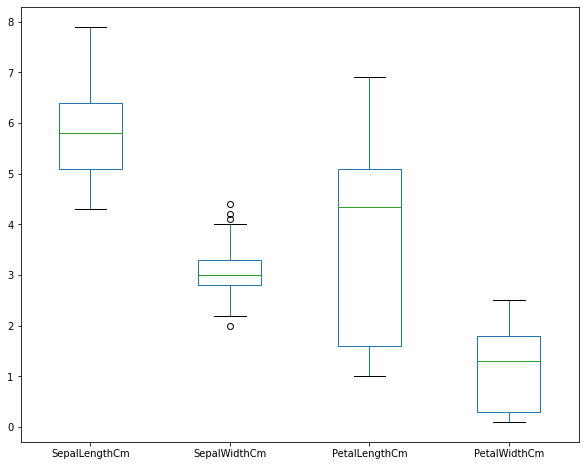

In [8]:
plt.rcParams["figure.figsize"] = (10,8)
data.plot(kind='box')
plt.show()

## Remove outliers with IQR method because clusters are sensitive to outliers.

In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3-Q1

data = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

## Check for Outliers by box plot

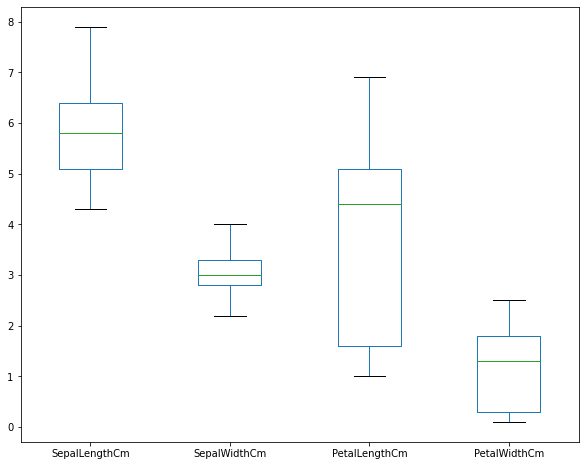

In [10]:
plt.rcParams["figure.figsize"] = (10,8)
data.plot(kind='box')
plt.show()

### Now,Dataset has no outliers.

In [11]:
# let's remove categorical column which is unnecessary for making clusters
x = data.drop('Species',axis=1)

In [12]:
# Categories of flowers
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

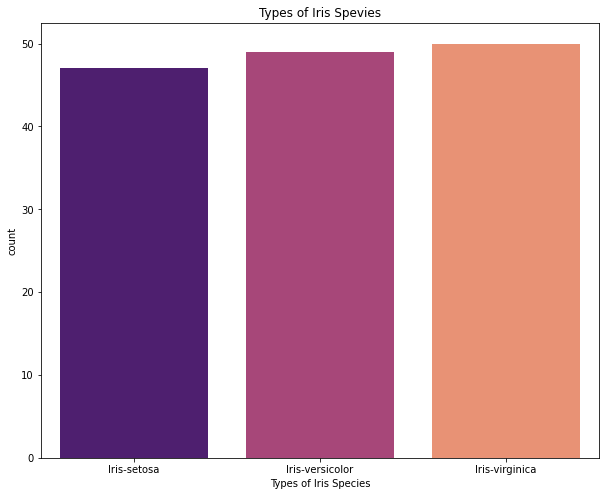

In [13]:
# value count of every class through countplot 
sns.countplot(data['Species'],palette='magma')
plt.xlabel('Types of Iris Species')
plt.title('Types of Iris Spevies')
plt.show()

In [14]:
# Labeling flower species
y = data['Species'].replace(('Iris-setosa','Iris-versicolor','Iris-virginica'),(0,1,2))

In [15]:
# check whether target variable is labeled or not.
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 146, dtype: int64

In [16]:
# splitting dataset into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =1)

In [17]:
# Let's build classification model
dt = DecisionTreeClassifier()

In [18]:
dt_model = dt.fit(x_train,y_train)
print("Decision tree model is created...")

Decision tree model is created...


In [19]:
# Predict y
y_pred = dt_model.predict(x_test)

In [20]:
from sklearn.datasets import load_iris

In [21]:
import sklearn.feature_extraction.text as feature_names_in_

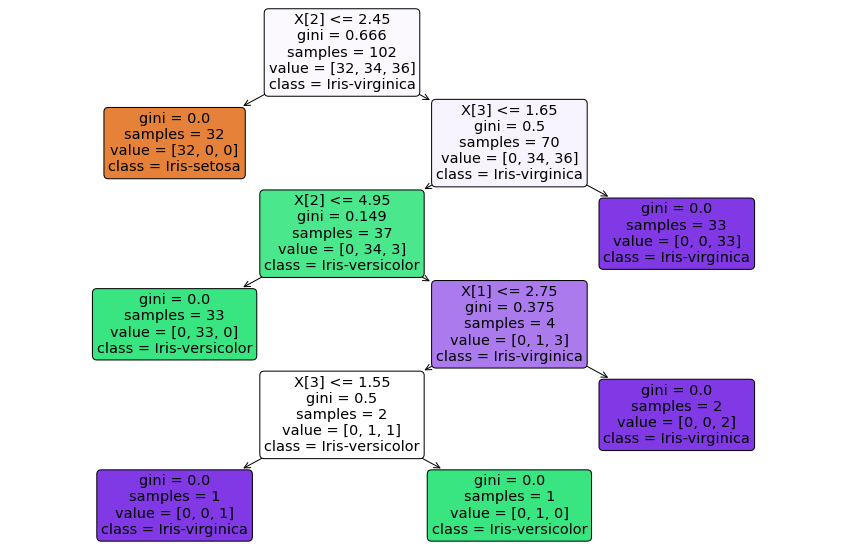

In [22]:
# visualizing Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model)
tree.plot_tree(dt, 
               class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
               rounded=True, 
               filled = True);

In [23]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 14]], dtype=int64)

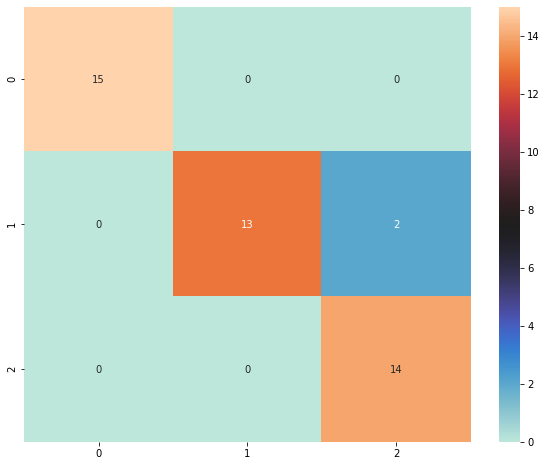

In [24]:
# Visualizing the confusion matrix with the help of heatmap
sns.heatmap(cm,annot=True,cmap='icefire')
plt.show()

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.95        44
weighted avg       0.96      0.95      0.95        44



We can feed any new data to this model and it would be able to predict the right class accordingly with 93% accuracy.

# Thank you...